In [31]:
import numpy as np
import matplotlib.pyplot as plt

## Import the Data 

In [72]:
history_plots=np.load("history_plots2.npz",allow_pickle='TRUE')
l=np.load("dataDR_bayes3_700.npz")
history=history_plots['arr_0'].item()

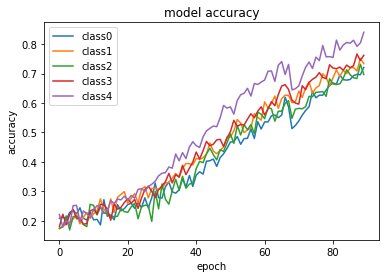

In [78]:
# summarize history for accuracy
plt.plot(history3['class0'])
plt.plot(history3['class1'])
plt.plot(history3['class2'])
plt.plot(history3['class3'])
plt.plot(history3['class4'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['class0','class1', 'class2', 'class3', 'class4'], loc='upper left')
plt.show()

In [79]:
total_prediction= l['arr_0']
total_label_prediction=l['arr_1']
total_aleatoric=l['arr_2']
total_epistemic=l['arr_3']
total_accuracy=l['arr_4']
total_tracker=l['arr_5']

In [81]:
def parameters3(Class):
    j=np.empty(1)
    for i in range(len(total_tracker)):
        
        if (total_tracker[i,0]==Class):
            j=np.vstack((j,i))
    
    k=j[1:].astype(int)
    
    #print(k[:,0])
    
    Avg_accuracy=sum(total_accuracy[k,:])/len(total_accuracy[k,:])
    Avg_prediction=sum(total_prediction[k,:])/len(total_prediction[k,:])
    Avg_label_prediction=sum(total_label_prediction[k,:])/len(total_label_prediction[k,:])
    Avg_aleatoric=sum(total_aleatoric[k,:])/len(total_aleatoric[k,:])
    Avg_epistemic=sum(total_epistemic[k,:])/len(total_epistemic[k,:])

    #print(len(total_epistemic[k,:]))
    #print(total_accuracy[k,:])
    #print(Avg_accuracy)
    return Avg_accuracy,Avg_prediction,Avg_aleatoric,Avg_epistemic

In [82]:
Avg_accuracy,Avg_prediction,Avg_aleatoric,Avg_epistemic=parameters3(3)
print(Avg_accuracy)
print(Avg_prediction)
print(Avg_aleatoric)
print(Avg_aleatoric[:,2])
print(Avg_epistemic)

[[0.73]]
[[0.12125267 0.14801423 0.12726272 0.52417082 0.06964012]]
[[0.07461423 0.09887132 0.08915633 0.12419009 0.04289185]]
[0.08915633]
[[0.01221265 0.01149896 0.01113579 0.02396335 0.01153154]]


In [84]:
Accuracy=np.empty(5)
prediction=np.empty(5)
Aleatoric=np.empty(5)
Epistemic=np.empty(5)
for i in range (5):
    Avg_accuracy,Avg_prediction,Avg_aleatoric,Avg_epistemic=parameters3(i)
    Accuracy[i]=Avg_accuracy
    prediction[i]=Avg_prediction[:,i]
    Aleatoric[i]=Avg_aleatoric[:,i]
    Epistemic[i]=Avg_epistemic[:,i]

In [85]:
print(Accuracy.shape)
print(Accuracy)

(5,)
[0.70428571 0.73428571 0.61142857 0.73       0.72285714]


In [86]:
line_width=1
fontsize1=14
fontsize2=7

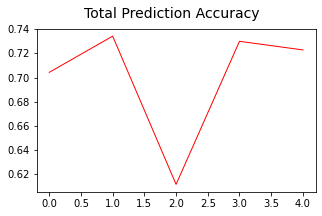

In [99]:
fig, (ax1) = plt.subplots(figsize=(5, 3))
fig.suptitle("Total Prediction Accuracy",fontsize=fontsize1)
ax1.plot(Accuracy,color='red', linestyle='solid',label='Accuracy',linewidth=line_width)

(0.0, 1.0)

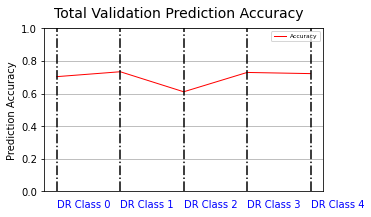

In [106]:
fig, (ax1) = plt.subplots(figsize=(5, 3))
fig.suptitle("Total Validation Prediction Accuracy",fontsize=fontsize1)


ax1.set_ylabel("Prediction Accuracy")
ax1.grid(axis='y')
ax1.xaxis.set_ticks([])
ax1.plot(Accuracy,color='red', linestyle='solid',label='Accuracy',linewidth=line_width)
text_pos=-0.1
ax1.text(0,text_pos,'DR Class 0',rotation=0,color='blue')
ax1.text(1,text_pos ,'DR Class 1',rotation=0,color='blue')
ax1.text(2,text_pos ,'DR Class 2',rotation=0,color='blue')
ax1.text(3,text_pos ,'DR Class 3',rotation=0,color='blue')
ax1.text(4,text_pos ,'DR Class 4',rotation=0,color='blue')
ax1.legend( prop={'size': 6})
ax1.axvline(x =0, color = 'black', linestyle='dashdot' )
ax1.axvline(x = 1, color = 'black', linestyle='dashdot' )
ax1.axvline(x = 2, color = 'black', linestyle='dashdot' )
ax1.axvline(x = 3, color = 'black', linestyle='dashdot' )
ax1.axvline(x = 4, color = 'black', linestyle='dashdot' )

ax1.set_ylim([0,1])

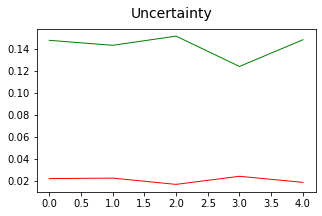

In [89]:
fig, (ax1) = plt.subplots(figsize=(5, 3))
fig.suptitle("Uncertainty",fontsize=fontsize1)

ax1.plot(Epistemic,color='red', linestyle='solid',label='Accuracy',linewidth=line_width)
ax1.plot(Aleatoric,color='green', linestyle='solid',label='Accuracy',linewidth=line_width)

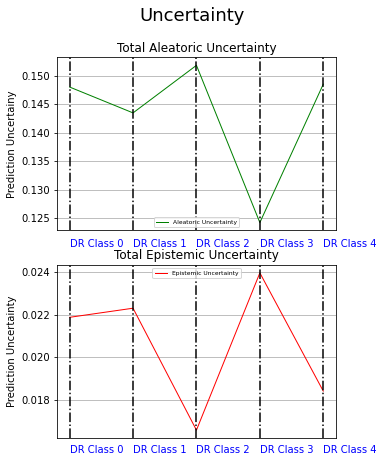

In [112]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(5, 7))
fig.suptitle("Uncertainty",fontsize=fontsize1+4)

ax1.set_ylabel("Prediction Uncertainy")
ax1.grid(axis='y')
ax1.xaxis.set_ticks([])
ax1.plot(Aleatoric,color='green', linestyle='solid',label='Aleatoric Uncertainty',linewidth=line_width)
text_pos=0.12

ax1.title.set_text('Total Aleatoric Uncertainty')

ax1.text(0,text_pos,'DR Class 0',rotation=0,color='blue')
ax1.text(1,text_pos ,'DR Class 1',rotation=0,color='blue')
ax1.text(2,text_pos ,'DR Class 2',rotation=0,color='blue')
ax1.text(3,text_pos ,'DR Class 3',rotation=0,color='blue')
ax1.text(4,text_pos ,'DR Class 4',rotation=0,color='blue')
ax1.legend( prop={'size': 6})
ax1.axvline(x =0, color = 'black', linestyle='dashdot' )
ax1.axvline(x = 1, color = 'black', linestyle='dashdot' )
ax1.axvline(x = 2, color = 'black', linestyle='dashdot' )
ax1.axvline(x = 3, color = 'black', linestyle='dashdot' )
ax1.axvline(x = 4, color = 'black', linestyle='dashdot' )

ax2.title.set_text('Total Epistemic Uncertainty')
ax2.plot(Epistemic,color='red', linestyle='solid',label='Epistemic Uncertainty',linewidth=line_width)

ax2.set_ylabel("Prediction Uncertainty")
ax2.grid(axis='y')
ax2.xaxis.set_ticks([])


text_pos=0.0155
ax2.text(0,text_pos,'DR Class 0',rotation=0,color='blue')
ax2.text(1,text_pos ,'DR Class 1',rotation=0,color='blue')
ax2.text(2,text_pos ,'DR Class 2',rotation=0,color='blue')
ax2.text(3,text_pos ,'DR Class 3',rotation=0,color='blue')
ax2.text(4,text_pos ,'DR Class 4',rotation=0,color='blue')
ax2.legend( prop={'size': 6})
ax2.axvline(x = 0, color = 'black', linestyle='dashdot' )
ax2.axvline(x = 1, color = 'black', linestyle='dashdot' )
ax2.axvline(x = 2, color = 'black', linestyle='dashdot' )
ax2.axvline(x = 3, color = 'black', linestyle='dashdot' )
ax2.axvline(x = 4, color = 'black', linestyle='dashdot' )